# Simple demo / test code for delay discounting

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
# import numpy as np
# from scipy.stats import norm
# import seaborn as sns

import darc
from darc.delayed import models
from darc.designs import BayesianAdaptiveDesignGeneratorDARC, DesignSpaceBuilder
# from darc.delayed.designs import Griskevicius2011, Frye, Koffarnus_Bickel, Kirby2009

from darc.data_plotting import data_plotter
from darc_parameter_recovery import simulated_experiment_trial_loop

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'

## First we construct a design space and build a `design_thing`

`D` is a pandas DataFrame consisting of all the possible designs (as rows).

In [4]:
D = DesignSpaceBuilder.delayed().build()
D.head()

,RA,DA,PA,RB,DB,PB
0,5.0,0.0,1.0,100.0,0.000694,1.0
1,5.0,0.0,1.0,100.0,0.001389,1.0
2,5.0,0.0,1.0,100.0,0.003472,1.0
3,5.0,0.0,1.0,100.0,0.006944,1.0
4,5.0,0.0,1.0,100.0,0.010417,1.0


Now we feed all these designs into our `BayesianAdaptiveDesignGeneratorDARC` class. We will use this primarily by calling the `get_next_design` method.

In [5]:
design_thing = BayesianAdaptiveDesignGeneratorDARC(D, max_trials=20)

## Construct a model

In [6]:
true_params = pd.DataFrame.from_dict({'logk': [-3], 'α': [2]})

model = models.Hyperbolic(n_particles=5_000)
model.θ_true = true_params

## Run a simulated experiment

In [7]:
fitted_model, summary_stats = simulated_experiment_trial_loop(
    design_thing, model, track_this_parameter=None)

/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:212: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled+n_times_sampled_iter))
/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:287: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled + n_times_sampled_iter))


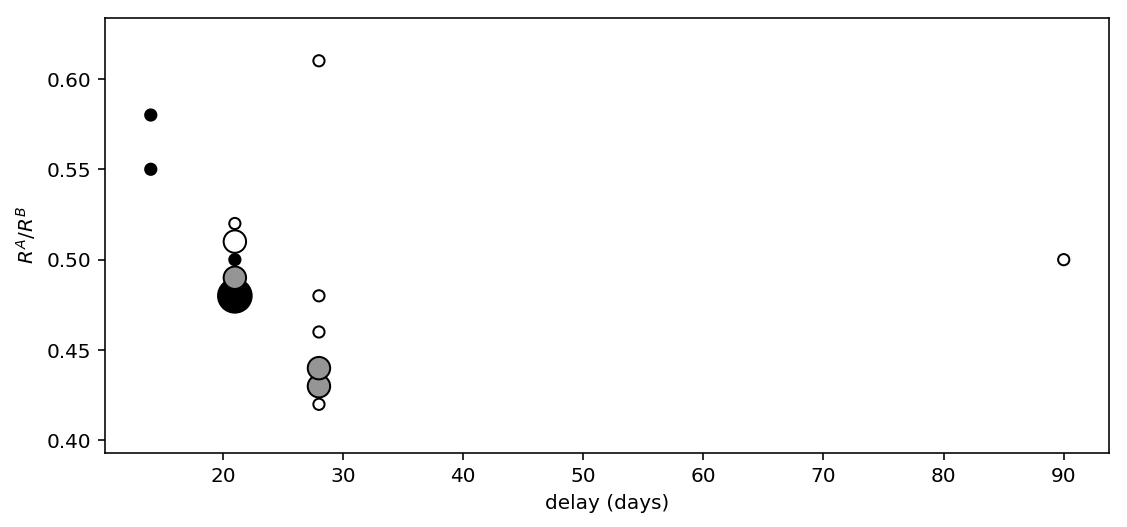

In [8]:
data_plotter(design_thing.get_df())